In [13]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

##reading content to the dataframe
dataframe = pd.read_csv('/content/sample_data/train_loan.csv')
dataframe.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#detecting missing values
dataframe.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#detecting count of missing values
dataframe.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
#Filled Missing value with 0 in Dependents
dataframe['Dependents']=dataframe['Dependents'].fillna(0)
dataframe.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,0
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


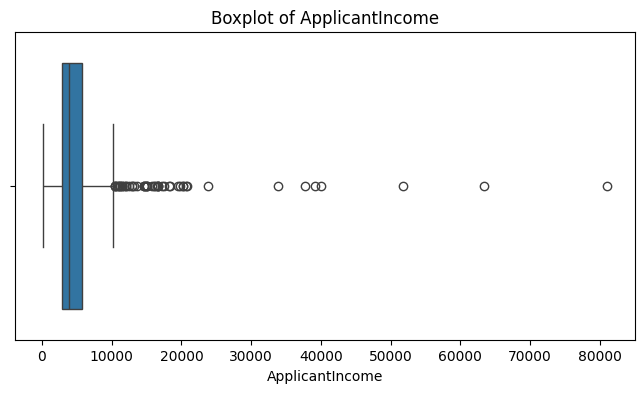

In [6]:
#Outlier detection
plt.figure(figsize=(8,4))
sns.boxplot (x=dataframe['ApplicantIncome'])
plt.title('Boxplot of ApplicantIncome')
plt.show()


In [10]:
# drop row with missing values
df_dropped = dataframe.dropna()
print(df_dropped)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0           

In [11]:
#Converting data Types
dataframe['LoanAmount'] = pd.to_numeric(dataframe['LoanAmount'],errors="coerce")
print(dataframe['LoanAmount'])

#Its already NaN so no changes in the dataframe

0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64


In [14]:
#Replacing Outlier
median_loanterm = dataframe['Loan_Amount_Term'].median()
dataframe['Loan_Amount_Term'] = np.where(dataframe['Loan_Amount_Term']>360,median_loanterm,dataframe['Loan_Amount_Term'])
print(dataframe['Loan_Amount_Term'])


0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64


In [15]:
#normalising
dataframe['NormalosedLoanAmt'] = (dataframe['LoanAmount']-dataframe['LoanAmount'].min())/(dataframe['LoanAmount'].max()-dataframe['LoanAmount'])
print(dataframe['NormalosedLoanAmt'])

0           NaN
1      0.208042
2      0.089905
3      0.191379
4      0.236136
         ...   
609    0.098569
610    0.046970
611    0.545861
612    0.346979
613    0.218695
Name: NormalosedLoanAmt, Length: 614, dtype: float64
